### Credentials 

### Task 

### Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset 

In [2]:
dataset=pd.read_csv('Titanic-Dataset.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Viewing dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking and handling null values 

In [4]:
#Checking for null values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Handling null values
dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)

In [6]:
dataset["Cabin"].fillna(dataset["Cabin"].mode().iloc[0],inplace=True)

In [7]:
dataset["Embarked"].fillna(dataset["Embarked"].mode().iloc[0],inplace=True)

### Data visualization 

In [8]:
#Caluclating correlation
corr=dataset.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

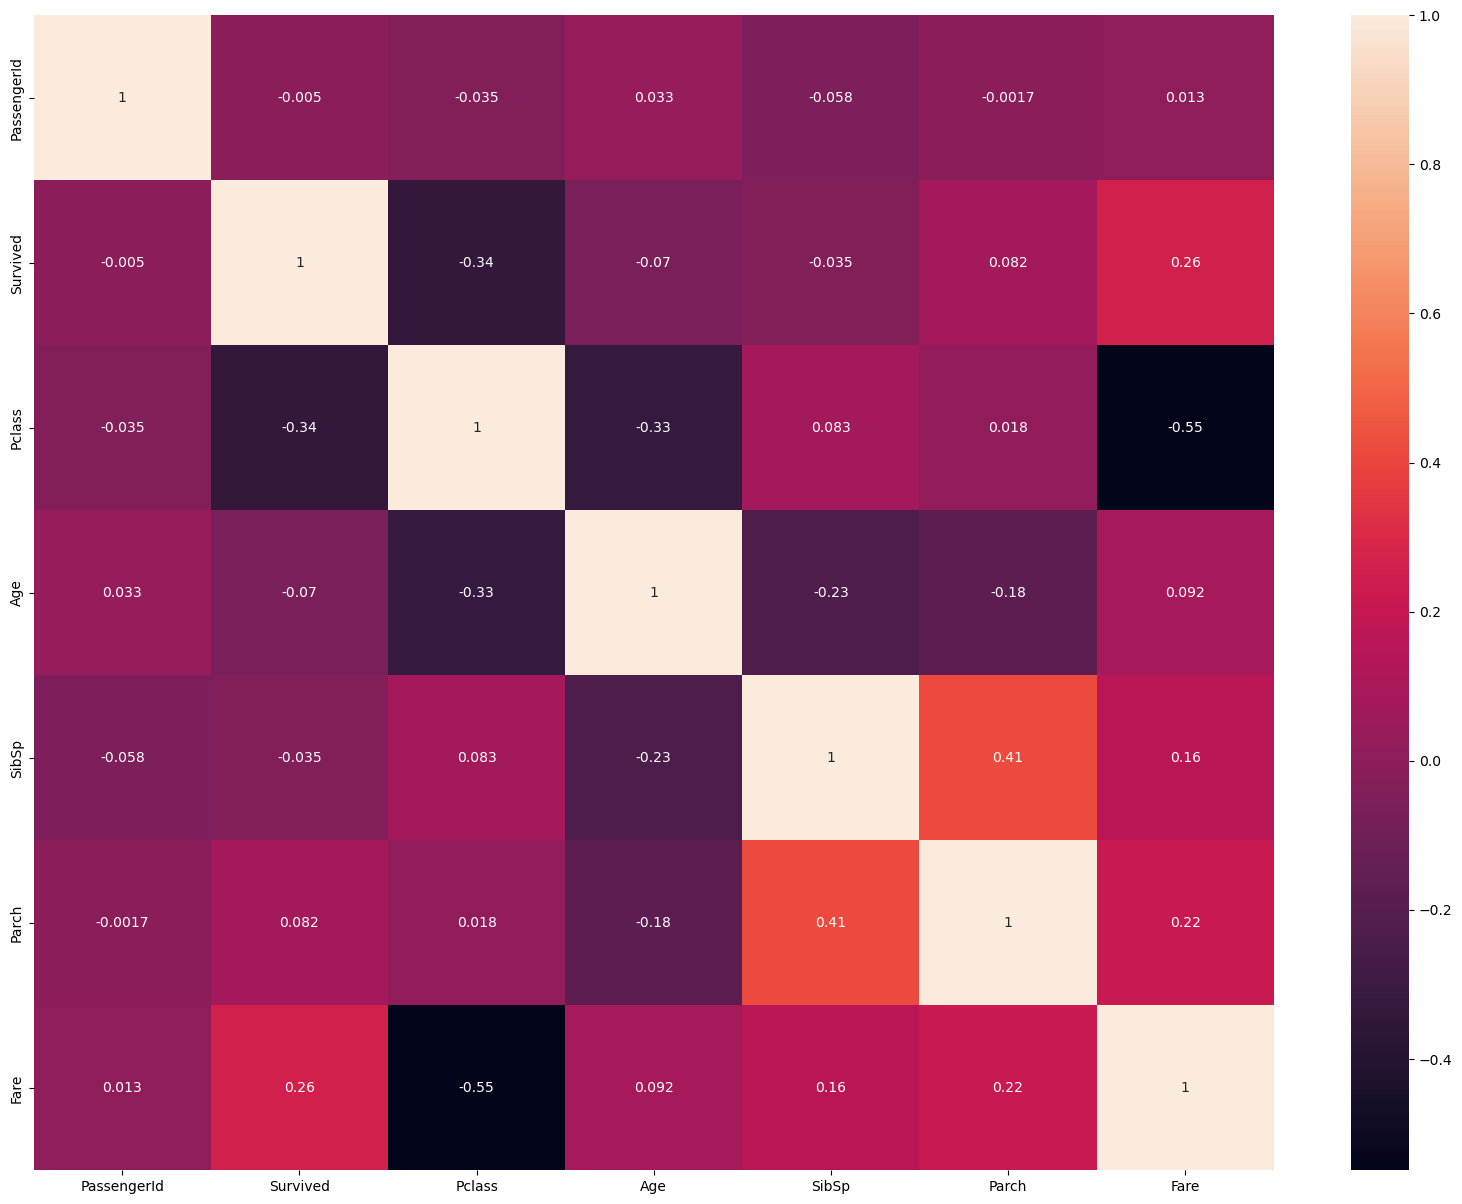

In [9]:
#Plotting the correlation heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

Text(0, 0.5, 'Count')

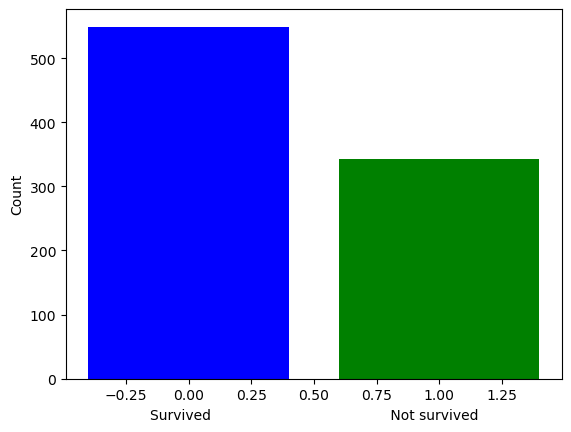

In [10]:
#PLotting bar graph representing the number of survivers vs non survivers
value_counts = dataset['Survived'].value_counts()
bar_colors = ['blue', 'green']
plt.bar(value_counts.index, value_counts.values,color=bar_colors)
plt.xlabel('Survived                                         Not survived')
plt.ylabel('Count')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

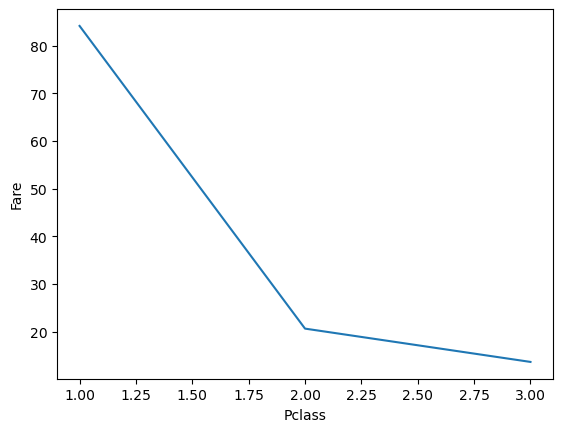

In [11]:
#Plotting a line graph denoting the relation between fare and passenger class
sns.lineplot(x="Pclass",y="Fare",data=dataset,ci=None) 

Text(0, 0.5, 'Count')

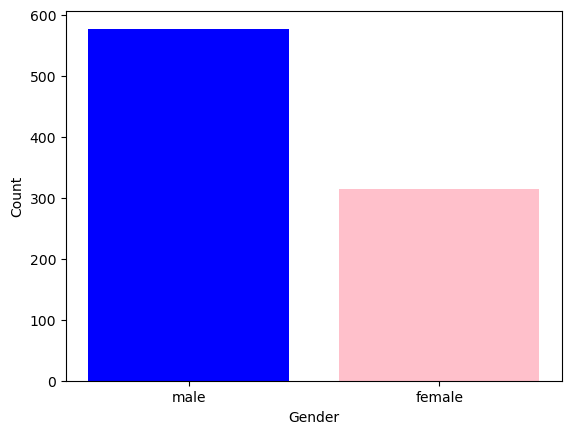

In [12]:
#Plotting bar graph representing the number of male and female passengers
value_counts = dataset['Sex'].value_counts()
bar_colors = ['blue', 'pink']
plt.bar(value_counts.index, value_counts.values,color=bar_colors)
plt.xlabel('Gender')
plt.ylabel('Count')

### Outlier detection and treatment

In [13]:
dataset['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


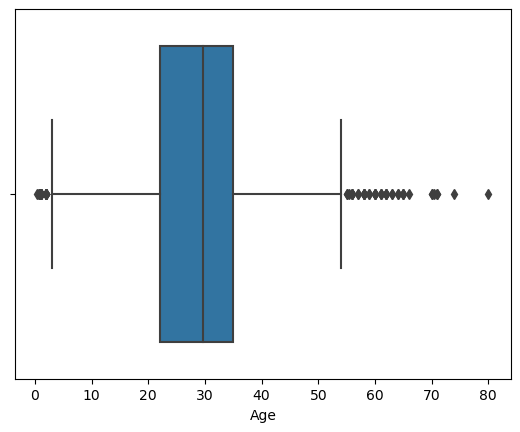

In [14]:
#Performing outlier detection on 'Age' using boxplot 
sns.boxplot(dataset.Age)
plt.show()

### Encoding 

In [15]:
#Importing preprocessing
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()

In [17]:
#Encoding Sex
dataset["Sex"]=le.fit_transform(dataset["Sex"])
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [18]:
#Encoding Name
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [19]:
# Map titles to numerical values
title_mapping = {
    'Mr': 0,
    'Miss': 1,
    'Mrs': 2,
    'Master': 3,
    'Dr': 4,
    'Rev': 5,
    'Mlle': 6,
    'Major': 7,
    'Col': 7,
    'Lady': 7,
    'Sir': 7,
    'Countess': 7,
    'Mme': 6,
    'Ms': 1,
    'Jonkheer': 7,
    'Don': 7,
    'Dona': 7
}
dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,S,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,0.0


In [21]:
#Dropping name as it has been encoded
dataset=dataset.drop('Name', axis=1)
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0.0
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1.0
3,4,1,1,0,35.000000,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,B96 B98,S,5.0
887,888,1,1,0,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,1.0
889,890,1,1,1,26.000000,0,0,111369,30.0000,C148,C,0.0


In [22]:
#Encoding cabin
dataset['Cabin_Deck'] = dataset['Cabin'].str.extract('([A-Za-z])')

In [23]:
dataset = pd.get_dummies(dataset, columns=['Cabin_Deck'], prefix='Cabin')

In [24]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0.0,0,1,0,0,0,0,0,0
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,C,2.0,0,0,1,0,0,0,0,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1.0,0,1,0,0,0,0,0,0
3,4,1,1,0,35.000000,1,0,113803,53.1000,C123,S,2.0,0,0,1,0,0,0,0,0
4,5,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,S,0.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,B96 B98,S,5.0,0,1,0,0,0,0,0,0
887,888,1,1,0,19.000000,0,0,112053,30.0000,B42,S,1.0,0,1,0,0,0,0,0,0
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,1.0,0,1,0,0,0,0,0,0
889,890,1,1,1,26.000000,0,0,111369,30.0000,C148,C,0.0,0,0,1,0,0,0,0,0


In [26]:
#Dropping cabin as it has been encoded
dataset=dataset.drop('Cabin', axis=1)
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,S,0.0,0,1,0,0,0,0,0,0
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,C,2.0,0,0,1,0,0,0,0,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,S,1.0,0,1,0,0,0,0,0,0
3,4,1,1,0,35.000000,1,0,113803,53.1000,S,2.0,0,0,1,0,0,0,0,0
4,5,0,3,1,35.000000,0,0,373450,8.0500,S,0.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,S,5.0,0,1,0,0,0,0,0,0
887,888,1,1,0,19.000000,0,0,112053,30.0000,S,1.0,0,1,0,0,0,0,0,0
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,S,1.0,0,1,0,0,0,0,0,0
889,890,1,1,1,26.000000,0,0,111369,30.0000,C,0.0,0,0,1,0,0,0,0,0


In [28]:
#Encoding embarked
dataset["Embarked"]=le.fit_transform(dataset["Embarked"])
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,2,0.0,0,1,0,0,0,0,0,0
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,0,2.0,0,0,1,0,0,0,0,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,2,1.0,0,1,0,0,0,0,0,0
3,4,1,1,0,35.000000,1,0,113803,53.1000,2,2.0,0,0,1,0,0,0,0,0
4,5,0,3,1,35.000000,0,0,373450,8.0500,2,0.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,2,5.0,0,1,0,0,0,0,0,0
887,888,1,1,0,19.000000,0,0,112053,30.0000,2,1.0,0,1,0,0,0,0,0,0
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,2,1.0,0,1,0,0,0,0,0,0
889,890,1,1,1,26.000000,0,0,111369,30.0000,0,0.0,0,0,1,0,0,0,0,0


In [29]:
#Dropping Ticket variable as it does not matter to the model
dataset=dataset.drop('Ticket',axis=1)
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,1,22.000000,1,0,7.2500,2,0.0,0,1,0,0,0,0,0,0
1,2,1,1,0,38.000000,1,0,71.2833,0,2.0,0,0,1,0,0,0,0,0
2,3,1,3,0,26.000000,0,0,7.9250,2,1.0,0,1,0,0,0,0,0,0
3,4,1,1,0,35.000000,1,0,53.1000,2,2.0,0,0,1,0,0,0,0,0
4,5,0,3,1,35.000000,0,0,8.0500,2,0.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2,5.0,0,1,0,0,0,0,0,0
887,888,1,1,0,19.000000,0,0,30.0000,2,1.0,0,1,0,0,0,0,0,0
888,889,0,3,0,29.699118,1,2,23.4500,2,1.0,0,1,0,0,0,0,0,0
889,890,1,1,1,26.000000,0,0,30.0000,0,0.0,0,0,1,0,0,0,0,0


### Sperating dependent and independent variables 

In [30]:
#Seperating dependent variables
x=dataset['Survived']
x

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
#Seperting independent variables
y=dataset.drop('Survived',axis=1)
y

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,3,1,22.000000,1,0,7.2500,2,0.0,0,1,0,0,0,0,0,0
1,2,1,0,38.000000,1,0,71.2833,0,2.0,0,0,1,0,0,0,0,0
2,3,3,0,26.000000,0,0,7.9250,2,1.0,0,1,0,0,0,0,0,0
3,4,1,0,35.000000,1,0,53.1000,2,2.0,0,0,1,0,0,0,0,0
4,5,3,1,35.000000,0,0,8.0500,2,0.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2,5.0,0,1,0,0,0,0,0,0
887,888,1,0,19.000000,0,0,30.0000,2,1.0,0,1,0,0,0,0,0,0
888,889,3,0,29.699118,1,2,23.4500,2,1.0,0,1,0,0,0,0,0,0
889,890,1,1,26.000000,0,0,30.0000,0,0.0,0,0,1,0,0,0,0,0


### splitting into training and testing set 

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
#Defining training and testing variables
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [34]:
#Checking shape of training and testing variables
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623,), (268,), (623, 17), (268, 17))

### Feature scaling 

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [42]:
#Transforming training variables to a standard scale
y_train=sc.fit_transform(y_train)
y_train

array([[ 1.59014094, -1.5325562 ,  0.72592065, ..., -0.12107015,
        -0.05675044, -0.04009635],
       [-1.52952238, -1.5325562 , -1.37756104, ..., -0.12107015,
        -0.05675044, -0.04009635],
       [-0.23515275,  0.84844757,  0.72592065, ..., -0.12107015,
        -0.05675044, -0.04009635],
       ...,
       [ 0.70655928,  0.84844757,  0.72592065, ..., -0.12107015,
        -0.05675044, -0.04009635],
       [ 0.43528421,  0.84844757, -1.37756104, ..., -0.12107015,
        -0.05675044, -0.04009635],
       [ 0.91970398, -0.34205431,  0.72592065, ..., -0.12107015,
        -0.05675044, -0.04009635]])

In [43]:
#Transforming testing variables to a standard scale
y_test=sc.fit_transform(y_test)
y_test

array([[ 0.21119888,  0.77963055,  0.76537495, ..., -0.12309149,
        -0.086711  ,  0.        ],
       [ 0.8106727 ,  0.77963055,  0.76537495, ..., -0.12309149,
        -0.086711  ,  0.        ],
       [-0.63903523,  0.77963055,  0.76537495, ..., -0.12309149,
        -0.086711  ,  0.        ],
       ...,
       [ 0.70096507,  0.77963055,  0.76537495, ..., -0.12309149,
        -0.086711  ,  0.        ],
       [ 1.35137458,  0.77963055, -1.30654916, ..., -0.12309149,
        -0.086711  ,  0.        ],
       [-1.47751496, -1.64991582,  0.76537495, ..., -0.12309149,
        -0.086711  ,  0.        ]])